# **Bike Sharing Linear Regression**

**Business Objective**

A US bike-sharing provider BoomBikes wants to understand the factors on which the demand for the shared bikes depends. Specifically, they want to understand the factors affecting the demand for the shared bikes in the American market. 

The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes.

2. How well those variables describe the bike demands

## **Importing required libraries**

In [ ]:
# Import necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

# Evaluate specific parameters and perform preprocessing steps of splitting and scaling
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Display detailed info about model
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## **Data Sourcing and Understanding**

In [ ]:
# read data from csv
df = pd.read_csv('day.csv')

In [ ]:
# print top 5 rows of the dataframe
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


**The data set seem to have incorrect data in the columns holiday, weekday and workingday as 01-01-2018 was Monday but it's showing 6th week day.**

**If holiday = 0 means holiday, then for instant 3, 4 and 5, workingday can't be 1.**

**If holiday = 0 means no holiday, then Monday is not a weekend, hence, workingday for instant 1 can't be 0.**

**But here, no changes are made in the dataset for uniformity.**

In [ ]:
# check the shape of dataframe
df.shape

(730, 16)

In [ ]:
# get detailed info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


**The dataset doesn't contain any null values**

In [ ]:
# get desciption of quantitative variables
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [ ]:
# checking the number of unique values
df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

## **Data Cleaning**

### **Remove duplicates**

In [ ]:
# remove duplicates if any
df.drop_duplicates(subset=None, inplace=True)
df.shape

(730, 16)

**There were no duplicates in the dataframe.**

### **Remove the unnecessary columns**

**1. instant - index column has no significance for our target**

**2. dteday - month and year columns are covering**

**3. casual,registered - cnt is the sum of these two**

In [ ]:
# removing instant, dteday, casual, registered columns
df.drop(['instant'],axis=1,inplace=True)
df.drop(['dteday'],axis=1,inplace=True)
df.drop(['casual'],axis=1,inplace=True)
df.drop(['registered'],axis=1,inplace=True)

In [ ]:
# checking the shape of the dataframe
df.shape

(730, 12)

In [ ]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

### **Map categorical variables with actual values**

In [ ]:
# mapping season column
df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [ ]:
# mapping mnth column
df.mnth = df.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [ ]:
# mapping weekday column
df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [ ]:
# mapping weathersit column
df.weathersit = df.weathersit.map({1:'clear',2:'misty',3:'light_snowrain',4:'heavy_snowrain'})

In [ ]:
# check the dataframe
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


## **EDA**

In [ ]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


#### **Plotting distribution of continuous variables**

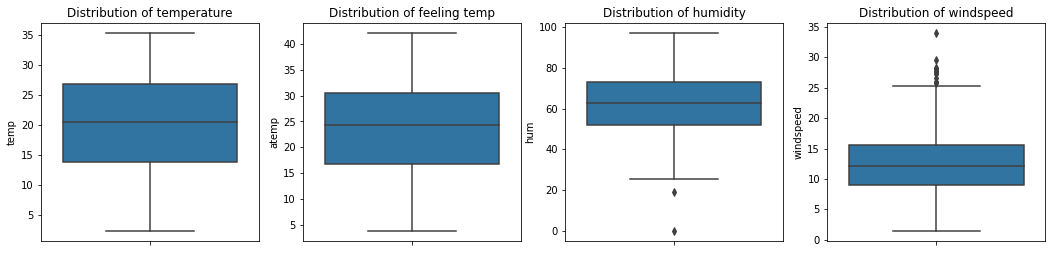

In [ ]:
plt.figure(figsize=(18, 4))

plt.subplot(1,4,1)
sns.boxplot(y = 'temp', data = df)
plt.title('Distribution of temperature')

plt.subplot(1,4,2)
sns.boxplot(y = 'atemp', data = df)
plt.title('Distribution of feeling temp')

plt.subplot(1,4,3)
sns.boxplot(y = 'hum', data = df)
plt.title('Distribution of humidity')

plt.subplot(1,4,4)
sns.boxplot(y = 'windspeed', data = df)
plt.title('Distribution of windspeed')
plt.show()

**There are no such outliers present in the continuous variables**

#### **Visualizing categorical variables with the target variable**

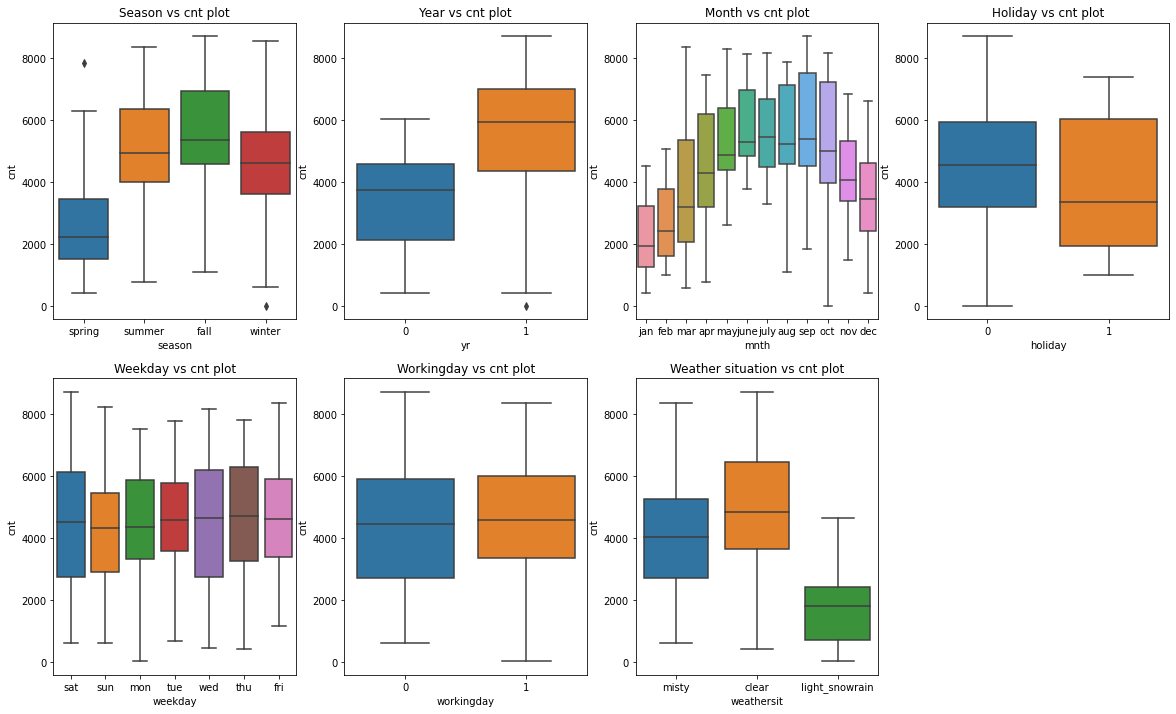

In [ ]:
plt.figure(figsize=(20, 12))

plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.title('Season vs cnt plot')

plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.title('Year vs cnt plot')

plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.title('Month vs cnt plot')

plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.title('Holiday vs cnt plot')

plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.title('Weekday vs cnt plot')

plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.title('Workingday vs cnt plot')

plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.title('Weather situation vs cnt plot')
plt.show()

#### **Pair plots to visualize correlation between all the variables**

<Figure size 1440x1080 with 0 Axes>

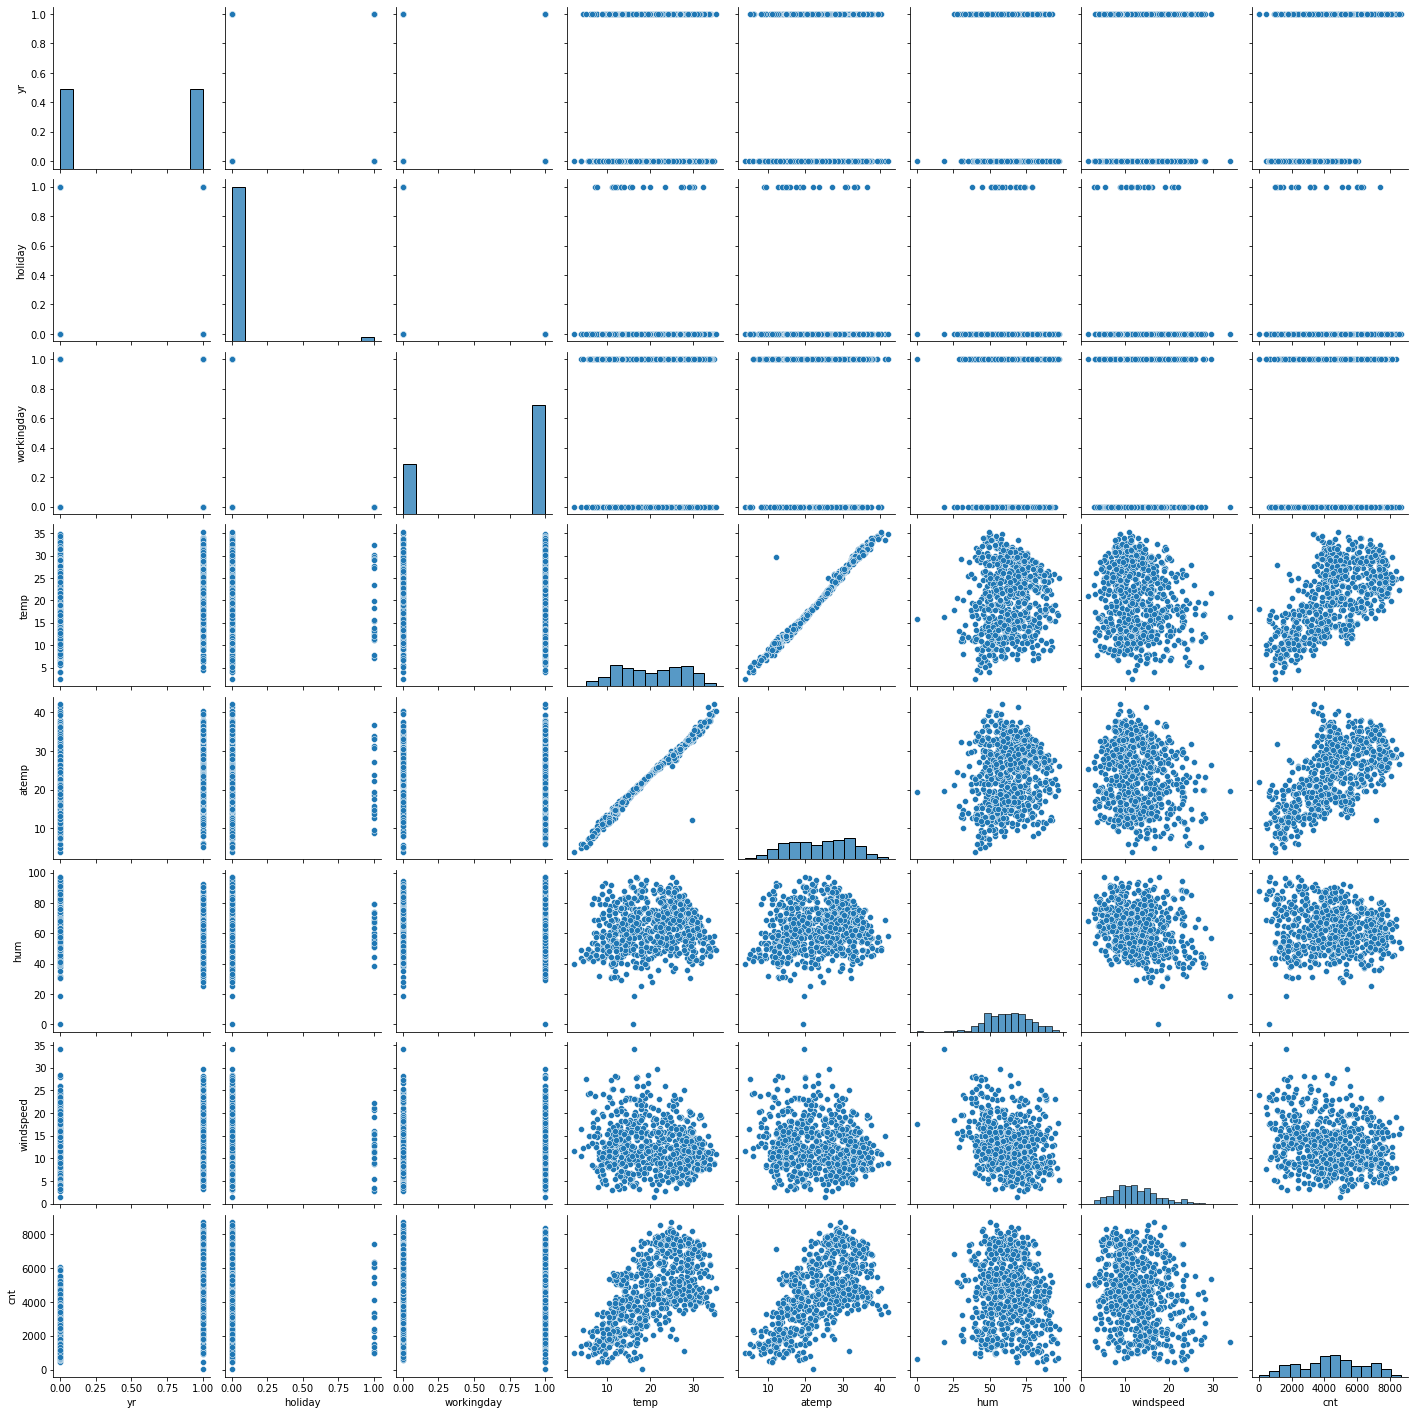

In [ ]:
plt.figure(figsize=(20,15))
sns.pairplot(df)
plt.show()

#### **Plotting correlation between all the numerical variables**

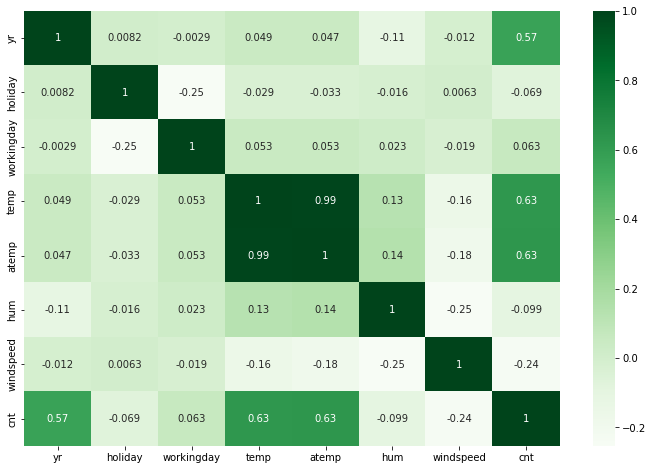

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap="Greens",annot=True)
plt.show()

**Columns temp and atemp are highly correlated with each other, hence, we will drop one of them.**

In [ ]:
df.drop(['atemp'],axis=1,inplace=True)

#### **Visualizing categorical variables with target variable w.r.t. year**

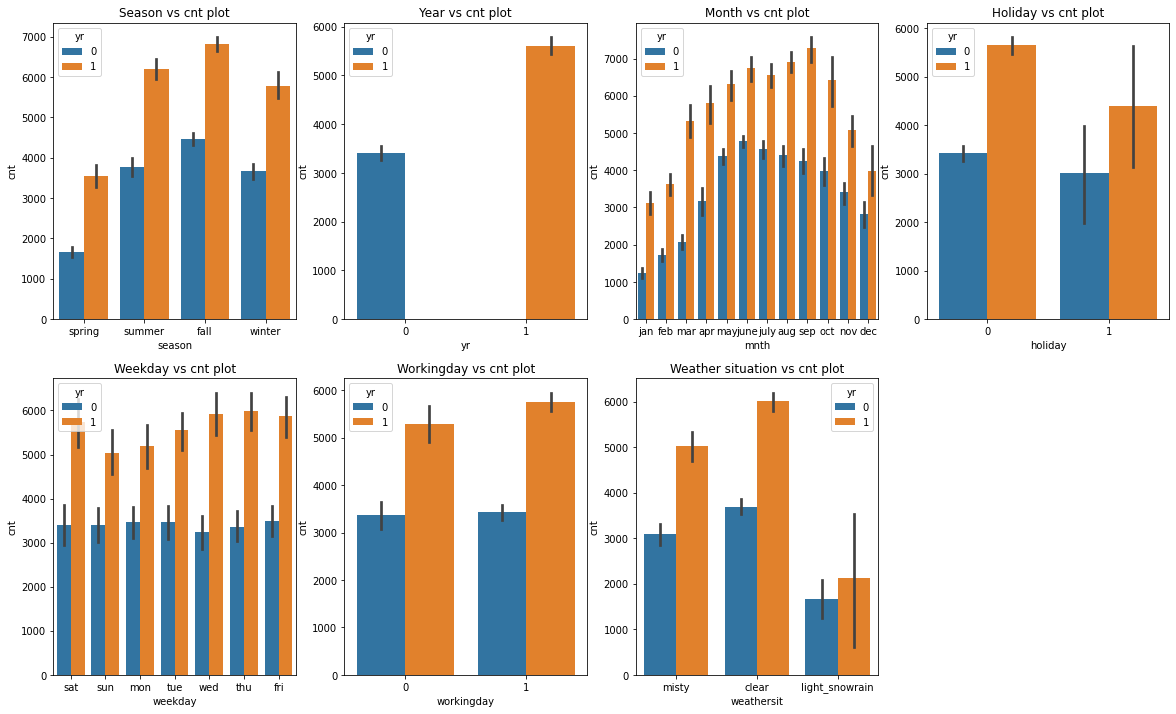

In [ ]:
plt.figure(figsize=(20, 12))

plt.subplot(2,4,1)
sns.barplot(x = 'season', y = 'cnt', hue='yr', data = df)
plt.title('Season vs cnt plot')

plt.subplot(2,4,2)
sns.barplot(x = 'yr', y = 'cnt', hue='yr', data = df)
plt.title('Year vs cnt plot')

plt.subplot(2,4,3)
sns.barplot(x = 'mnth', y = 'cnt', hue='yr', data = df)
plt.title('Month vs cnt plot')

plt.subplot(2,4,4)
sns.barplot(x = 'holiday', y = 'cnt', hue='yr', data = df)
plt.title('Holiday vs cnt plot')

plt.subplot(2,4,5)
sns.barplot(x = 'weekday', y = 'cnt', hue='yr', data = df)
plt.title('Weekday vs cnt plot')

plt.subplot(2,4,6)
sns.barplot(x = 'workingday', y = 'cnt', hue='yr', data = df)
plt.title('Workingday vs cnt plot')

plt.subplot(2,4,7)
sns.barplot(x = 'weathersit', y = 'cnt', hue='yr', data = df)
plt.title('Weather situation vs cnt plot')
plt.show()

**Inferences Drawn**

**1. Fall has most bookings and the bookings in each season increase from 2018 to 2019.**

**2. The number of bookings have increased from 2018 to 2019.**

**3. Most bookings are done during the month of may, june, july, aug, sep and oct. Bookings increase in the starting of the year till mid of the year and then start decreasing till end of year. Number of bookings for each month have increased from 2018 to 2019.**

**4. Bookings are almost same on working and non working days but the number of bookings have increased from 2018 to 2019.**

**5. Bookings are maximum for clear weather which is quite obvious and bookings for each season have increased from 2018 to 2019.**

## **Data Preparation for modelling**

### **Create dummy variables**

In [ ]:
# creating dummy variables for season, mnth, weekday and weathersit
# drop_first is used to drop 1 dummy variable so that n-1 variables are created
# where n is the no. of distinct values in the column
df = pd.get_dummies(data=df,columns=["season","mnth","weekday"],drop_first=True)
df = pd.get_dummies(data=df,columns=["weathersit"])

In [ ]:
# checking columns of the dataframe
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july', 'mnth_june',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_clear',
       'weathersit_light_snowrain', 'weathersit_misty'],
      dtype='object')

In [ ]:
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_clear,weathersit_light_snowrain,weathersit_misty
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,1,1,0,0


### **Splitting data set into Training & Testing set**

In [ ]:
# y contains only target variable cnt
y=df.pop('cnt')

# X contains independent variables
X=df

# split in ratio 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape

(511, 29)

In [ ]:
y_train.shape

(511,)

In [ ]:
X_test.shape

(219, 29)

In [ ]:
y_test.shape

(219,)

### **Feature scaling**

In [ ]:
# scaling all the continuous variables using MinMax scaler
cols = ['temp','hum','windspeed']
scaler = MinMaxScaler()
X_train[cols] = scaler.fit_transform(X_train[cols])

In [ ]:
X_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_clear,weathersit_light_snowrain,weathersit_misty
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.669276,0.550874,0.654174,0.414873,0.230920,0.258317,0.250489,0.074364,...,0.09002,0.148728,0.150685,0.152642,0.146771,0.131115,0.140900,0.624266,0.029354,0.346380
std,0.500067,0.163398,0.470935,0.227231,0.143648,0.185619,0.421834,0.438138,0.433719,0.262619,...,0.28649,0.356169,0.358092,0.359994,0.354224,0.337857,0.348259,0.484786,0.168963,0.476282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.544598,0.281934,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575304,0.659940,0.384732,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745079,0.756977,0.526481,0.000000,1.000000,0.500000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## **Model building**

### **Building model using RFE**

In [ ]:
# Running RFE with the output number of the variables equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [ ]:
# columns selected by RFE and their ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 2),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 11),
 ('season_winter', True, 1),
 ('mnth_aug', False, 7),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 9),
 ('mnth_jan', False, 15),
 ('mnth_july', True, 1),
 ('mnth_june', False, 14),
 ('mnth_mar', True, 1),
 ('mnth_may', False, 5),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 6),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 10),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 4),
 ('weekday_thu', False, 13),
 ('weekday_tue', False, 8),
 ('weekday_wed', False, 12),
 ('weathersit_clear', True, 1),
 ('weathersit_light_snowrain', True, 1),
 ('weathersit_misty', False, 3)]

In [ ]:
# features selected by RFE 
col = X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_july', 'mnth_mar', 'mnth_nov',
       'mnth_sep', 'weekday_sat', 'weathersit_clear',
       'weathersit_light_snowrain'],
      dtype='object')

In [ ]:
# features not selected by RFE
X_train.columns[~rfe.support_]

Index(['holiday', 'season_summer', 'mnth_aug', 'mnth_feb', 'mnth_jan',
       'mnth_june', 'mnth_may', 'mnth_oct', 'weekday_mon', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed', 'weathersit_misty'],
      dtype='object')

### **Building model using statsmodel**

In [ ]:
# function defined to build a statsmodel api model
# col - list of columns with which model is to be built
def build_model(col):
    X_train_sm = sm.add_constant(X_train[col])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [ ]:
# function defined to calculate VIF
# col - list of columns of which VIF is to be calculated
def get_vif(col):
    df1 = X_train[col]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

#### **MODEL 1**

In [ ]:
# model 1 using columns selected by RFE
col = ['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_july', 'mnth_mar', 'mnth_nov',
       'mnth_sep', 'weekday_sat', 'weathersit_clear',
       'weathersit_light_snowrain']
lr1 = build_model(col)
get_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     177.2
Date:                Sun, 25 Sep 2022   Prob (F-statistic):          6.53e-188
Time:                        20:38:36   Log-Likelihood:                -4119.6
No. Observations:                 511   AIC:                             8271.
Df Residuals:                     495   BIC:                             8339.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### **MODEL 2**

In [ ]:
# model 2 built by dropping temp column due to high VIF
col = ['yr', 'workingday', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_july', 'mnth_mar', 'mnth_nov',
       'mnth_sep', 'weekday_sat', 'weathersit_clear',
       'weathersit_light_snowrain']
lr2 = build_model(col)
get_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     137.3
Date:                Sun, 25 Sep 2022   Prob (F-statistic):          2.02e-160
Time:                        20:38:36   Log-Likelihood:                -4187.9
No. Observations:                 511   AIC:                             8406.
Df Residuals:                     496   BIC:                             8469.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### **MODEL 3**

In [ ]:
# since r-squared and adjusted r-squared decreases
# model 3 built by dropping hum column and adding temp due to high VIF
col = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_july', 'mnth_mar', 'mnth_nov',
       'mnth_sep', 'weekday_sat', 'weathersit_clear',
       'weathersit_light_snowrain']
lr3 = build_model(col)
get_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     183.6
Date:                Sun, 25 Sep 2022   Prob (F-statistic):          7.33e-186
Time:                        20:38:36   Log-Likelihood:                -4127.2
No. Observations:                 511   AIC:                             8284.
Df Residuals:                     496   BIC:                             8348.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### **MODEL 4**

In [ ]:
# model 4 built by dropping windspeed column due to high VIF
col.remove('windspeed')
lr4 = build_model(col)
get_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     191.3
Date:                Sun, 25 Sep 2022   Prob (F-statistic):          7.45e-184
Time:                        20:38:36   Log-Likelihood:                -4134.7
No. Observations:                 511   AIC:                             8297.
Df Residuals:                     497   BIC:                             8357.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### **MODEL 5**

In [ ]:
# model 5 built by dropping workingday column due to high VIF
col.remove('workingday')
lr5 = build_model(col)
get_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     198.8
Date:                Sun, 25 Sep 2022   Prob (F-statistic):          3.97e-181
Time:                        20:38:36   Log-Likelihood:                -4143.9
No. Observations:                 511   AIC:                             8314.
Df Residuals:                     498   BIC:                             8369.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### **MODEL 6**

In [ ]:
# model 6 built by dropping weekday_sat column due to high p-value
col.remove('weekday_sat')
lr6 = build_model(col)
get_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     216.4
Date:                Sun, 25 Sep 2022   Prob (F-statistic):          6.34e-182
Time:                        20:38:36   Log-Likelihood:                -4144.8
No. Observations:                 511   AIC:                             8314.
Df Residuals:                     499   BIC:                             8365.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Since, the columns used in lr6 model have low multicollinearity and produce a significant LR model, we will use these columns to build a similar LR model using sklearn so that the constant can be included as here, the constant is introduced only in the function.**

### **Final model using sklearn to be used for predictions**

In [ ]:
lm = LinearRegression()
lm.fit(X_train[col],y_train)

LinearRegression()

In [ ]:
# printing model parameters
print(lm.intercept_,lm.coef_)

1336.0415321716664 [ 1998.91139064  3576.69923383 -1327.67364829   782.98869045
  -510.57827212  -422.50296735   496.04866812  -692.63862084
   427.45967508   698.75829229 -1658.84620736]


**The model parameters of lm are same as that of lr6.**

**Now, this lm model will be used for residual analysis and model evaluation.**

## **Model Predictions**

### **Predictions on training set**

In [ ]:
# finding predictions of training set
y_train_pred = lm.predict(X_train[col])

### **Predictions on testing set**

In [ ]:
# Scaling variables in X_test
cols = ['temp','hum','windspeed']
X_test[cols] = scaler.transform(X_test[cols])

In [ ]:
col               # columns used in building the LR model 

['yr',
 'temp',
 'season_spring',
 'season_winter',
 'mnth_dec',
 'mnth_july',
 'mnth_mar',
 'mnth_nov',
 'mnth_sep',
 'weathersit_clear',
 'weathersit_light_snowrain']

In [ ]:
# predicting test data values
y_test_pred = lm.predict(X_test[col])

## **Residual Analysis**

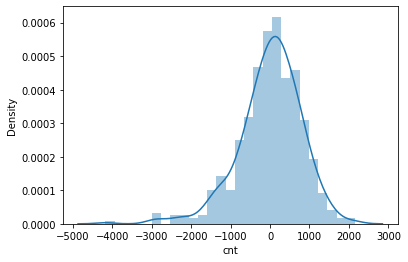

In [ ]:
# plotting residuals of training set
residual = y_train - y_train_pred
sns.distplot(residual)

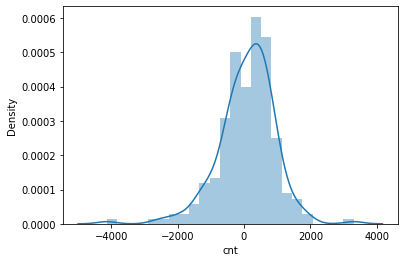

In [ ]:
# plotting residuals of testing set
test_residual = y_test - y_test_pred
sns.distplot(test_residual)

**The above plot shows that the residuals of test set are normally distributed.**

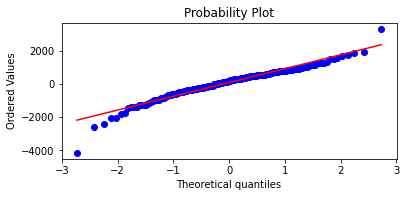

In [ ]:
# q-q plot 
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(test_residual, plot=ax, fit=True)

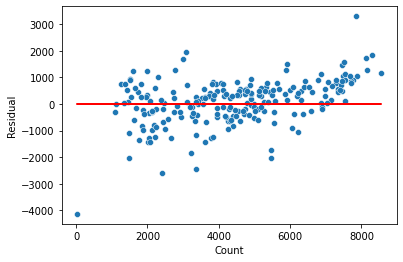

In [ ]:
sns.scatterplot(y_test,test_residual)
plt.plot(y_test,(y_test - y_test), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

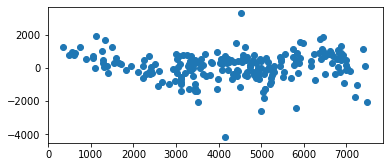

In [ ]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_test_pred, test_residual)

**The above plots show that the test residuals have constant variance.**

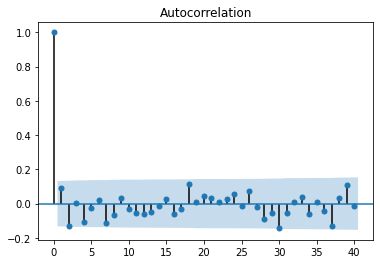

In [ ]:
acf = smt.graphics.plot_acf(test_residual, lags=40 , alpha=0.05)
acf.show()

**The above plot shows that the test residuals are independent of each other and do not have any autocorrelation.**

## **Model Evaluation**

In [ ]:
# R-squared for training set
r2_score(y_train,y_train_pred)

0.8266956170802411

In [ ]:
# R-squared for testing set
r2_score(y_test,y_test_pred)

0.8046825951122349

## **Model Summary**

In [ ]:
col               # columns used in building the LR model 

['yr',
 'temp',
 'season_spring',
 'season_winter',
 'mnth_dec',
 'mnth_july',
 'mnth_mar',
 'mnth_nov',
 'mnth_sep',
 'weathersit_clear',
 'weathersit_light_snowrain']

In [ ]:
lm = build_model(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     216.4
Date:                Sun, 25 Sep 2022   Prob (F-statistic):          6.34e-182
Time:                        21:05:03   Log-Likelihood:                -4144.8
No. Observations:                 511   AIC:                             8314.
Df Residuals:                     499   BIC:                             8365.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**The equation of best fitted line according to the model is**

*cnt* = 1336.0415 + 1998.9114 * *yr* + 3576.6992 * *temp* - 1327.6736 * *season_spring* + 782.9887 * *season_winter* - 510.5783 * *mnth_dec* - 422.5030 * *mnth_july* + 496.0487 * *mnth_mar* - 692.638 * *mnth_nov* + 427.4597 * *mnth_sep* + 698.7583 * *weathersit_clear* - 1658.8462 * *weathersit_light_snowrain*                   

**The variables on which the demand of bikes depend are**

1. Year
2. Temperature
3. Season (spring, winter)
4. Month (dec, july, march, nov, sep)
5. Weather situation (clear, light snow and rain)